In [1]:
import cv2
import matplotlib.pyplot as plt 
import numpy as np

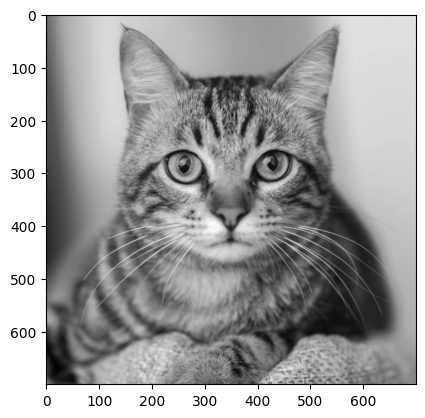

In [2]:
img = cv2.imread("images/org_img.jpg", flags=cv2.IMREAD_GRAYSCALE)
img = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX) # Normalize the image to 0-255
plt.imshow(img,cmap='gray')


In [3]:
# DEFINE PARAMETERS (Copied from Lowe's paper)
num_octaves = 4
s = 3 # number of intervals per octave
sigma_init = 1.6 # initial sigma
k = 2**(1/s) # sigma multiplier

# Initial blur of the image
img_blur = cv2.GaussianBlur(img, (0,0), sigma_init)

In [4]:
# Precompute incremental sigmas similar to OpenCV
sigmas = [sigma_init]
for i in range(1, s + 3):
    sig_prev = sigma_init * (k ** (i - 1))
    sig_total = sig_prev * k
    sigmas.append((sig_total**2 - sig_prev**2) ** 0.5)

gaussian_pyramid = [[] for _ in range(num_octaves)]
gaussian_pyramid[0].append(img_blur)  # base image

for octave in range(num_octaves):
    if octave > 0:
        # Downsample the last blurred image from previous octave (index s)
        img_prev_oct = gaussian_pyramid[octave - 1][s]
        img_down = cv2.resize(img_prev_oct, (0, 0), fx=0.5, fy=0.5, interpolation=cv2.INTER_LINEAR)
        gaussian_pyramid[octave].append(img_down)
        img_blur = img_down

    for i in range(1, s + 3):
        img_blur = cv2.GaussianBlur(img_blur, (0, 0), sigmas[i])
        gaussian_pyramid[octave].append(img_blur)


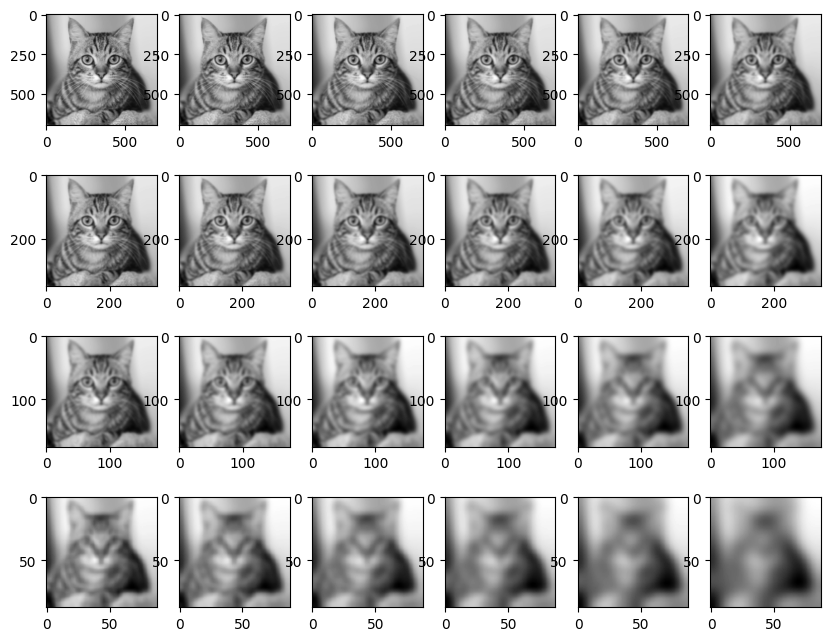

In [5]:
# Plot DoG pyramid
fig, axes = plt.subplots(num_octaves, s + 3, figsize=(2*(s + 2), 2*num_octaves))

for octave_idx, octave_images in enumerate(gaussian_pyramid):
    for img_idx, img in enumerate(octave_images):
        ax = axes[octave_idx, img_idx]
        ax.imshow(img, cmap='gray')

In [6]:
# Compute DoG pyramid
dog_pyramid = [[] for _ in range(num_octaves)]

for octave in range(num_octaves):
    for i in range(s + 2):
        if i == 0:
            # First DoG image is the difference between the first two blurred images
            dog_pyramid[octave].append(gaussian_pyramid[octave][i+1] - gaussian_pyramid[octave][i])
        else:
            # Subsequent DoG images are differences between consecutive blurred images
            dog_pyramid[octave].append(gaussian_pyramid[octave][i+1] - gaussian_pyramid[octave][i-1])



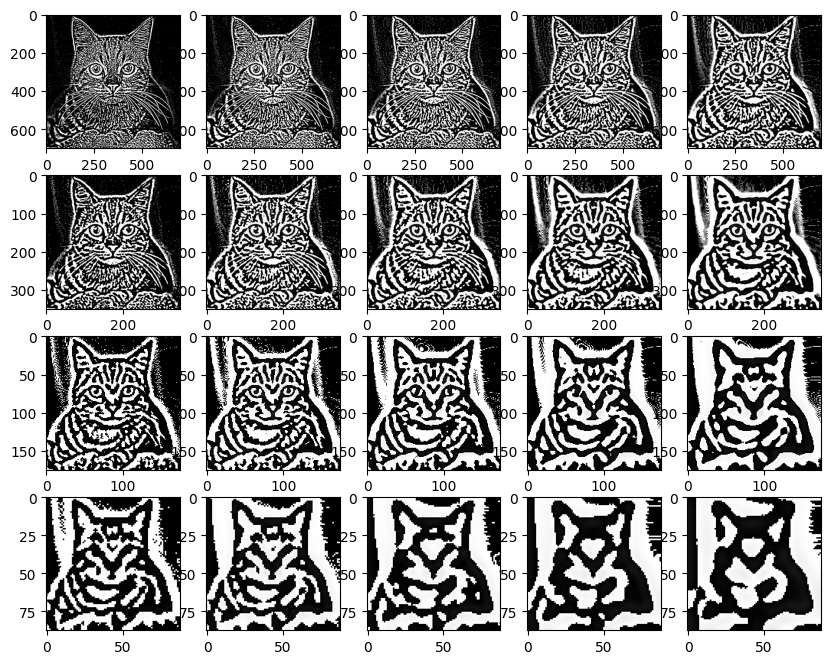

In [7]:
# Plot DoG pyramid
fig, axes = plt.subplots(num_octaves, s + 2, figsize=(2*(s + 2), 2*num_octaves))

for octave_idx, octave_images in enumerate(dog_pyramid):
    for img_idx, img in enumerate(octave_images):
        ax = axes[octave_idx, img_idx]
        ax.imshow(img, cmap='gray')